![](https://tribune-reloaded.s3.amazonaws.com/media/images/2187156-netflixsocialrectangle-1585549450/2187156-netflixsocialrectangle-1585549450.png)

In [62]:
import numpy as np 
import pandas as pd
import plotly as py
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected = True)
from plotly.subplots import make_subplots
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

In [23]:
films = pd.read_csv('../input/netflix-shows/netflix_titles.csv')

# Basic information

In [24]:
films.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [25]:
films.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [26]:
films.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

# Preprocessing

**First of all, I would like to make a separate year and month of the premiere date (date_added)**

In [27]:
films['date_added'] = films['date_added'].fillna('No data')

films['year_added'] = films['date_added'].apply(lambda x: x[-4:len(x)])
films['month_added'] = films['date_added'].apply(lambda x: x.split(' ')[0])

films.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,August
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,December
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,December


**Then make the age rating in more understandable form**

There are 7 movies and TV shows without rating, it's not a problem to find out the rating. Mostly used [IMDb](https://www.imdb.com/?ref_=nv_home).

In [28]:
films.query('rating != rating')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
67,s68,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...,2017,January
2359,s2360,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel...",2016,December
3660,s3661,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take...",2018,February
3736,s3737,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,NaN,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi...",2017,April
3737,s3738,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,NaN,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...,2016,September
3738,s3739,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,NaN,66 min,Movies,The comic puts his trademark hilarious/thought...,2016,August
4323,s4324,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c...",2017,March


In [29]:
films.iloc[67, 8] = 'R' 
films.iloc[2359, 8] = 'TV-14'
films.iloc[3660, 8] = 'TV-PG'
films.iloc[3736, 8] = 'R'
films.iloc[3737, 8] = 'R'
films.iloc[3738, 8] = 'R'
films.iloc[4323, 8] = 'PG-13'

**To compare the rating and the age group used information from [prime video](https://www.primevideo.com/help/ref=atv_hp_nd_cnt?nodeId=GFGQU3WYEG6FSJFJ)**

In [30]:
films['rating'].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y',
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [31]:
films['age_group'] = films['rating']
MR_age = {'TV-MA': 'Adults',
          'R': 'Adults',
          'PG-13': 'Teens',
          'TV-14': 'Young Adults',
          'TV-PG': 'Older Kids',
          'NR': 'Adults',
          'TV-G': 'Kids',
          'TV-Y': 'Kids',
          'TV-Y7': 'Older Kids',
          'PG': 'Older Kids',
          'G': 'Kids',
          'NC-17': 'Adults',
          'TV-Y7-FV': 'Older Kids',
          'UR': 'Adults'}
films['age_group'] = films['age_group'].map(MR_age)

**Some movies and TV shows have several countries. Therefore, I will classify the films for each country.**

In [32]:
films['country'] = films['country'].fillna('No data')

countries = []
for i in range(len(films.index)):
    x = films.iloc[i, 5].split(',')
    for j in range(len(x)):
        if x[j].strip() not in countries:
            countries.append(x[j].strip())
        else:
            continue
            
countries.remove('')
countries

['Brazil',
 'Mexico',
 'Singapore',
 'United States',
 'Turkey',
 'Egypt',
 'India',
 'Poland',
 'Thailand',
 'Nigeria',
 'No data',
 'Norway',
 'Iceland',
 'United Kingdom',
 'Japan',
 'South Korea',
 'Italy',
 'Canada',
 'Indonesia',
 'Romania',
 'Spain',
 'South Africa',
 'France',
 'Portugal',
 'Hong Kong',
 'China',
 'Germany',
 'Argentina',
 'Serbia',
 'Denmark',
 'Kenya',
 'New Zealand',
 'Pakistan',
 'Australia',
 'Taiwan',
 'Netherlands',
 'Philippines',
 'United Arab Emirates',
 'Iran',
 'Belgium',
 'Israel',
 'Uruguay',
 'Bulgaria',
 'Chile',
 'Russia',
 'Mauritius',
 'Lebanon',
 'Colombia',
 'Algeria',
 'Soviet Union',
 'Sweden',
 'Malaysia',
 'Ireland',
 'Luxembourg',
 'Finland',
 'Austria',
 'Peru',
 'Senegal',
 'Switzerland',
 'Ghana',
 'Saudi Arabia',
 'Armenia',
 'Jordan',
 'Mongolia',
 'Namibia',
 'Qatar',
 'Vietnam',
 'Syria',
 'Kuwait',
 'Malta',
 'Czech Republic',
 'Bahamas',
 'Sri Lanka',
 'Cayman Islands',
 'Bangladesh',
 'Zimbabwe',
 'Hungary',
 'Latvia',
 'Liec

In [33]:
for i in range(len(countries)):
    films[countries[i]] = 0
    for j in range(len(films.index)):
        if countries[i] in films.iloc[j, 5]:
            films[countries[i]][j] = 1
            
films.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,age_group,Brazil,Mexico,Singapore,United States,Turkey,Egypt,India,Poland,Thailand,Nigeria,No data,Norway,Iceland,United Kingdom,Japan,South Korea,Italy,Canada,Indonesia,Romania,Spain,South Africa,France,Portugal,Hong Kong,China,Germany,Argentina,Serbia,Denmark,Kenya,New Zealand,Pakistan,Australia,Taiwan,Netherlands,Philippines,United Arab Emirates,Iran,Belgium,Israel,Uruguay,Bulgaria,Chile,Russia,Mauritius,Lebanon,Colombia,Algeria,Soviet Union,Sweden,Malaysia,Ireland,Luxembourg,Finland,Austria,Peru,Senegal,Switzerland,Ghana,Saudi Arabia,Armenia,Jordan,Mongolia,Namibia,Qatar,Vietnam,Syria,Kuwait,Malta,Czech Republic,Bahamas,Sri Lanka,Cayman Islands,Bangladesh,Zimbabwe,Hungary,Latvia,Liechtenstein,Venezuela,Morocco,Cambodia,Albania,Cuba,Nicaragua,Greece,Croatia,Guatemala,West Germany,Slovenia,Dominican Republic,Nepal,Samoa,Azerbaijan,Bermuda,Ecuador,Georgia,Botswana,Puerto Rico,Iraq,Vatican City,Angola,Ukraine,Jamaica,Belarus,Cyprus,Kazakhstan,Malawi,Slovakia,Lithuania,Afghanistan,Paraguay,Somalia,Sudan,Panama,Uganda,East Germany,Montenegro
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,August,Adults,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,December,Adults,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,December,Adults,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Thus, the analysis will take into account the participation of each country.

**Now I want to know all kinds of genres and classify all the movies and TV shows**

In [34]:
genres = []
for i in range(len(films.index)):
    x = films.iloc[i, 10].split(',')
    for j in range(len(x)):
        if x[j].strip() not in genres:
            genres.append(x[j].strip())
        else:
            continue

genres

['International TV Shows',
 'TV Dramas',
 'TV Sci-Fi & Fantasy',
 'Dramas',
 'International Movies',
 'Horror Movies',
 'Action & Adventure',
 'Independent Movies',
 'Sci-Fi & Fantasy',
 'TV Mysteries',
 'Thrillers',
 'Crime TV Shows',
 'Docuseries',
 'Documentaries',
 'Sports Movies',
 'Comedies',
 'Anime Series',
 'Reality TV',
 'TV Comedies',
 'Romantic Movies',
 'Romantic TV Shows',
 'Science & Nature TV',
 'Movies',
 'British TV Shows',
 'Korean TV Shows',
 'Music & Musicals',
 'LGBTQ Movies',
 'Faith & Spirituality',
 "Kids' TV",
 'TV Action & Adventure',
 'Spanish-Language TV Shows',
 'Children & Family Movies',
 'TV Shows',
 'Classic Movies',
 'Cult Movies',
 'TV Horror',
 'Stand-Up Comedy & Talk Shows',
 'Teen TV Shows',
 'Stand-Up Comedy',
 'Anime Features',
 'TV Thrillers',
 'Classic & Cult TV']

In [35]:
for i in range(len(genres)):
    films[genres[i]] = 0
    for j in range(len(films.index)):
        if genres[i] in films.iloc[j, 10]:
            films[genres[i]][j] = 1

**In duration leave only integers**

In [40]:
films['duration'] = films['duration'].map(lambda x: x.split(' ')[0]).astype('int')

In [43]:
films = films.drop(['listed_in', 'director', 'cast', 'rating', 'date_added', 'show_id', 'country', 'No data'], axis = 1) 
# Drop all columns that will not participate in the analysis

**Let's see the result of preprocessing**

In [44]:
films.sample(3)

,type,title,release_year,duration,description,year_added,month_added,age_group,Brazil,Mexico,Singapore,United States,Turkey,Egypt,India,Poland,Thailand,Nigeria,Norway,Iceland,United Kingdom,Japan,South Korea,Italy,Canada,Indonesia,Romania,Spain,South Africa,France,Portugal,Hong Kong,China,Germany,Argentina,Serbia,Denmark,Kenya,New Zealand,Pakistan,Australia,Taiwan,Netherlands,Philippines,United Arab Emirates,Iran,Belgium,Israel,Uruguay,Bulgaria,Chile,Russia,Mauritius,Lebanon,Colombia,Algeria,Soviet Union,Sweden,Malaysia,Ireland,Luxembourg,Finland,Austria,Peru,Senegal,Switzerland,Ghana,Saudi Arabia,Armenia,Jordan,Mongolia,Namibia,Qatar,Vietnam,Syria,Kuwait,Malta,Czech Republic,Bahamas,Sri Lanka,Cayman Islands,Bangladesh,Zimbabwe,Hungary,Latvia,Liechtenstein,Venezuela,Morocco,Cambodia,Albania,Cuba,Nicaragua,Greece,Croatia,Guatemala,West Germany,Slovenia,Dominican Republic,Nepal,Samoa,Azerbaijan,Bermuda,Ecuador,Georgia,Botswana,Puerto Rico,Iraq,Vatican City,Angola,Ukraine,Jamaica,Belarus,Cyprus,Kazakhstan,Malawi,Slovakia,Lithuania,Afghanistan,Paraguay,Somalia,Sudan,Panama,Uganda,East Germany,Montenegro,International TV Shows,TV Dramas,TV Sci-Fi & Fantasy,Dramas,International Movies,Horror Movies,Action & Adventure,Independent Movies,Sci-Fi & Fantasy,TV Mysteries,Thrillers,Crime TV Shows,Docuseries,Documentaries,Sports Movies,Comedies,Anime Series,Reality TV,TV Comedies,Romantic Movies,Romantic TV Shows,Science & Nature TV,Movies,British TV Shows,Korean TV Shows,Music & Musicals,LGBTQ Movies,Faith & Spirituality,Kids' TV,TV Action & Adventure,Spanish-Language TV Shows,Children & Family Movies,TV Shows,Classic Movies,Cult Movies,TV Horror,Stand-Up Comedy & Talk Shows,Teen TV Shows,Stand-Up Comedy,Anime Features,TV Thrillers,Classic & Cult TV
2501,TV Show,Gormiti,2018,1,Four friends become guardians of the island Go...,2020,December,Kids,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2644,TV Show,Hashoter Hatov,2015,1,An honest – though overzealous – police office...,2018,December,Adults,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
176,Movie,A Glimpse Inside the Mind of Charles Swan III,2012,86,When his girlfriend walks out and leaves him a...,2018,July,Adults,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Word Cloud

**Keywords in the description of movies and TV shows**

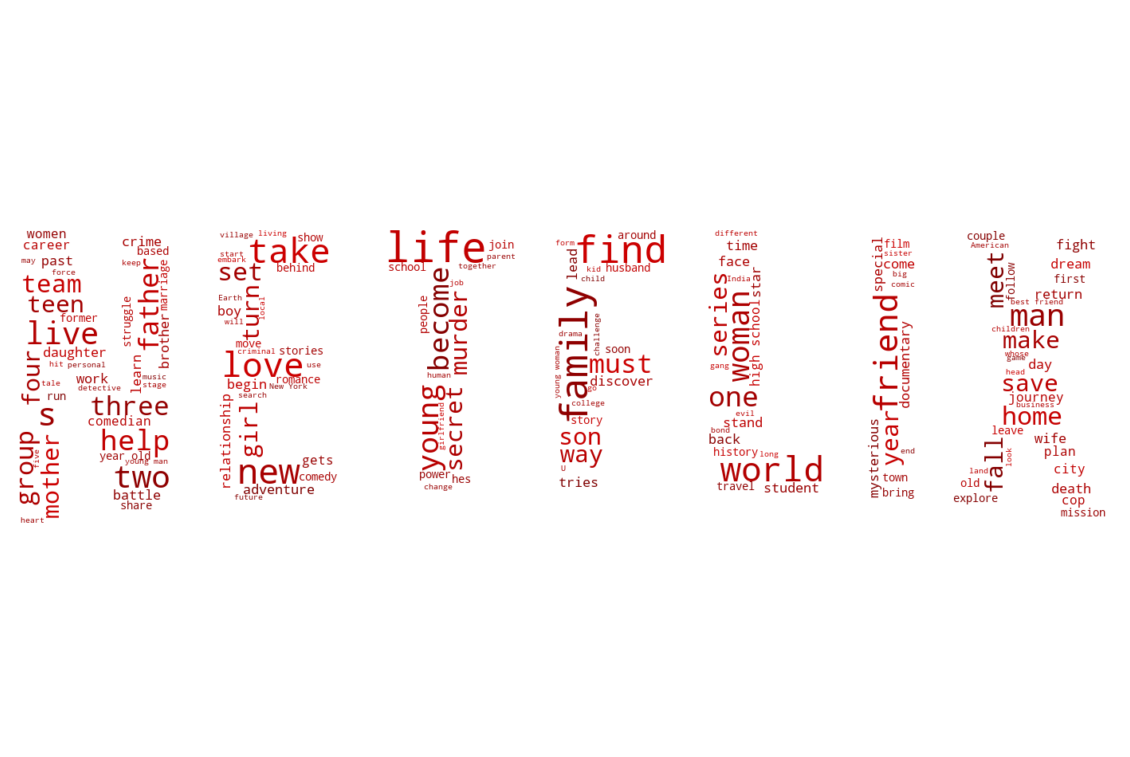

In [49]:
from wordcloud import WordCloud
from PIL import Image
import random

text = str(list(films['description'])).replace(',', '').replace('[', '').replace("'", '').replace(']', '').replace('.', '')

def red_color_func(word, font_size, position, orientation, random_state = None, **kwargs):
    return "hsl(0, 100%%, %f%%)" % random.randint(25, 40)

mask = np.array(Image.open('../input/logo-net/netflix-logo-actuel.jpg'))

plt.rcParams['figure.figsize'] = (20, 20)
wordcloud = WordCloud(background_color = 'white', width = 1400,  height = 1400, max_words = 170, mask = mask).generate(text)

wordcloud.recolor(color_func = red_color_func)

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

# Dictribution of TV shows and movies

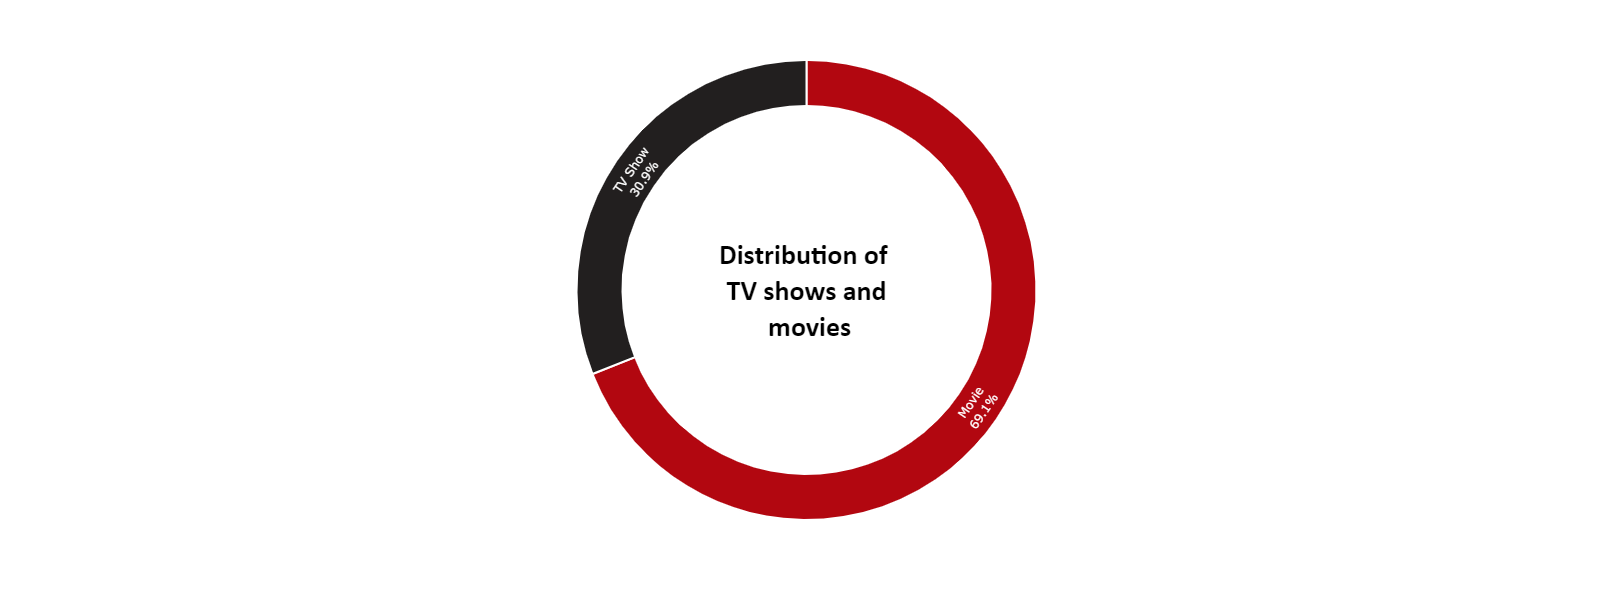

In [106]:
fig = px.pie(films['type'].value_counts().reset_index(), values = 'type', names = 'index', width = 600, height = 600)
fig.update_traces(textposition = 'inside', 
                  textinfo = 'percent + label', 
                  hole = 0.8, 
                  marker = dict(colors = ['#b20710','#221f1f'], line = dict(color = 'white', width = 2)))

fig.update_layout(annotations = [dict(text = 'Distribution of <br> TV shows and <br> movies', 
                                      x = 0.5, y = 0.5, font_size = 28, showarrow = False, 
                                      font_family = 'Calibri Black',
                                      font_color = 'black')],
                  showlegend = False)
                  
fig.show()

**TOP-5 countries by count of added movies**

In [59]:
movies_added = pd.DataFrame(columns = ['country', 'movies'], index = range((films.columns.get_loc('Montenegro') + 1) - 7))
for i in range(8, (films.columns.get_loc('Montenegro') + 1)):
    movies = len(films.query('type == "Movie"').index) - films.query('type == "Movie"').iloc[:, i].value_counts().reset_index().iloc[0, 1]
    movies_added.iloc[i - 7, 0] = films.columns[i]
    movies_added.iloc[i - 7, 1] = movies
    
movies_added = movies_added.sort_values('movies', ascending = False).head(5)
movies_added

,country,movies
4,United States,2431
7,India,915
13,United Kingdom,467
17,Canada,286
22,France,265


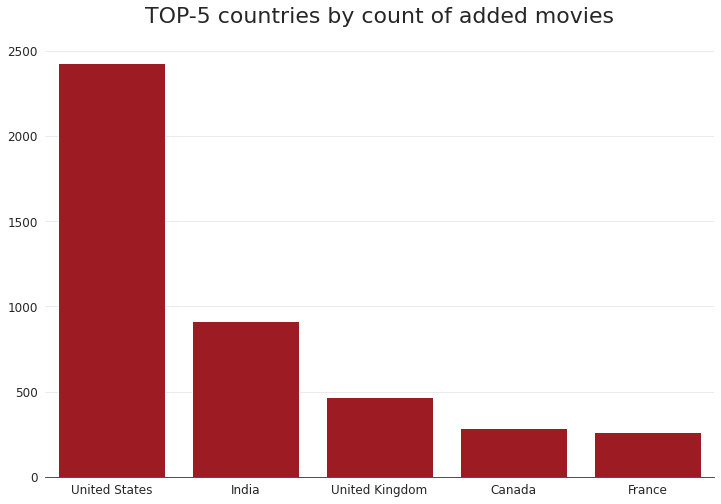

In [93]:
sns.set_style('white')
plt.figure(figsize = (12, 8))
plt.title('TOP-5 countries by count of added movies', size = 22, x = 0.5, y = 1.03)
plt.grid(color = 'gray', linestyle = '-', axis = 'y', alpha = 0.2)
a = sns.barplot(data = movies_added, x = movies_added['country'], y = movies_added['movies'], palette = ['#b20710'])
a.tick_params(labelsize = 12)
plt.ylabel('')
plt.xlabel('')
for i in ['right', 'left', 'top']:
    a.spines[i].set_visible(False)
plt.show()

**Dynamics of adding movies by TOP-5 countries**

In [97]:
USaddM = films.query('`United States` == 1 & type == "Movie"').groupby('year_added').agg({'United States': 'count'})
UKaddM = films.query('`United Kingdom` == 1 & type == "Movie"').groupby('year_added').agg({'United Kingdom': 'count'})
INDaddM = films.query('India == 1 & type == "Movie"').groupby('year_added').agg({'India': 'count'})
CANaddM = films.query('Canada == 1 & type == "Movie"').groupby('year_added').agg({'Canada': 'count'})
FRaddM = films.query('France == 1 & type == "Movie"').groupby('year_added').agg({'France': 'count'})

WaddM = USaddM.join(UKaddM, how = 'outer')\
.join(INDaddM, how = 'outer')\
.join(CANaddM, how = 'outer')\
.join(FRaddM, how = 'outer').fillna(0).reset_index()

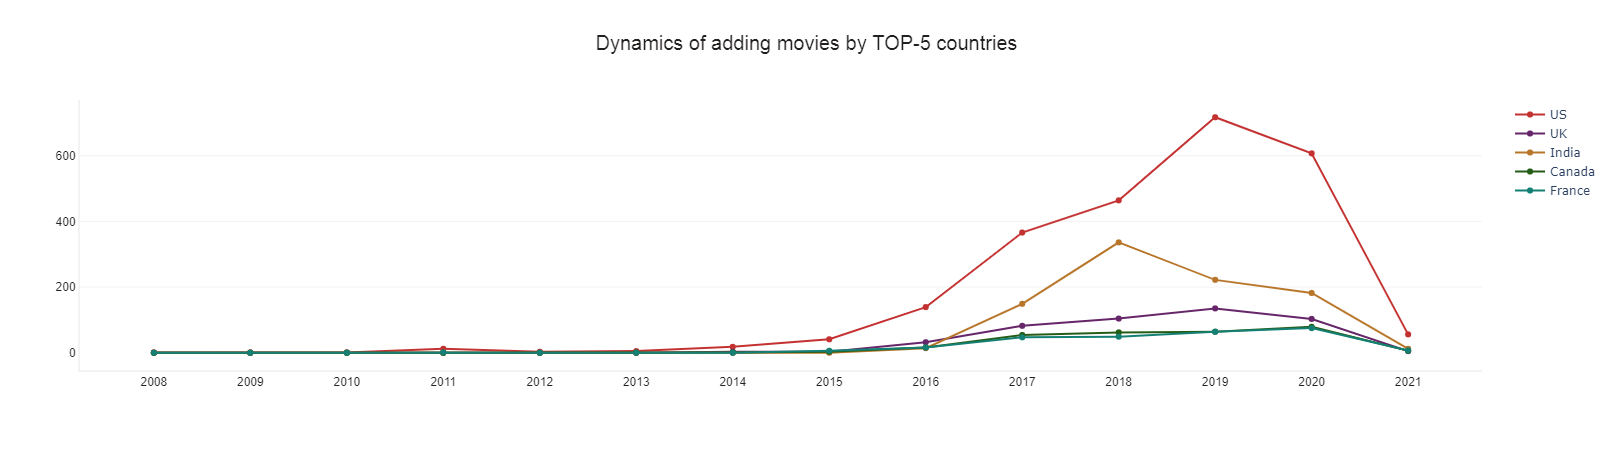

In [98]:
fig = go.Figure()
fig.add_trace(go.Scatter( 
    x = WaddM['year_added'], 
    y = WaddM['United States'],
    mode = 'lines + markers',
    name = 'US',
    marker_color = '#c43131',
))
fig.add_trace(go.Scatter( 
    x = WaddM['year_added'], 
    y = WaddM['United Kingdom'],
    mode = 'lines + markers',
    name = 'UK',
    marker_color = '#672669',
))
fig.add_trace(go.Scatter( 
    x = WaddM['year_added'], 
    y = WaddM['India'],
    mode = 'lines + markers',
    name = 'India',
    marker_color = '#b8762a',
))
fig.add_trace(go.Scatter( 
    x = WaddM['year_added'], 
    y = WaddM['Canada'],
    mode = 'lines + markers',
    name = 'Canada',
    marker_color = '#245c16',
))
fig.add_trace(go.Scatter( 
    x = WaddM['year_added'], 
    y = WaddM['France'],
    mode = 'lines + markers',
    name = 'France',
    marker_color = '#147f73',
))

fig.update_layout(plot_bgcolor = 'white', title = 'Dynamics of adding movies by TOP-5 countries', 
                  title_font_family = 'Arial', title_font_color = '#221f1f', title_font_size = 20, title_x = 0.5)
fig.update_xaxes(showline = True, linecolor = '#f5f2f2', linewidth = 2, tickfont_family = 'Arial', tickfont_color = '#221f1f', tickfont_size = 12)
fig.update_yaxes(showline = True, linecolor = '#f5f2f2', 
                 showgrid = True, gridwidth = 1, gridcolor = '#f5f2f2',
                 linewidth = 2, tickfont_family = 'Arial', tickfont_color = '#221f1f', tickfont_size = 12)

fig.show()

**TOP-5 countries by count of added TV shows**

In [103]:
shows_added = pd.DataFrame(columns = ['country', 'TV shows'], index = range((films.columns.get_loc('Montenegro') + 1) - 7))
for i in range(8, (films.columns.get_loc('Montenegro') + 1)):
    shows = len(films.query('type == "TV Show"').index) - films.query('type == "TV Show"').iloc[:, i].value_counts().reset_index().iloc[0, 1]
    shows_added.iloc[i - 7, 0] = films.columns[i]
    shows_added.iloc[i - 7, 1] = shows
    
shows_added = shows_added.sort_values('TV shows', ascending = False).head(5)
shows_added

,country,TV shows
4,United States,866
13,United Kingdom,256
14,Japan,184
15,South Korea,157
17,Canada,126


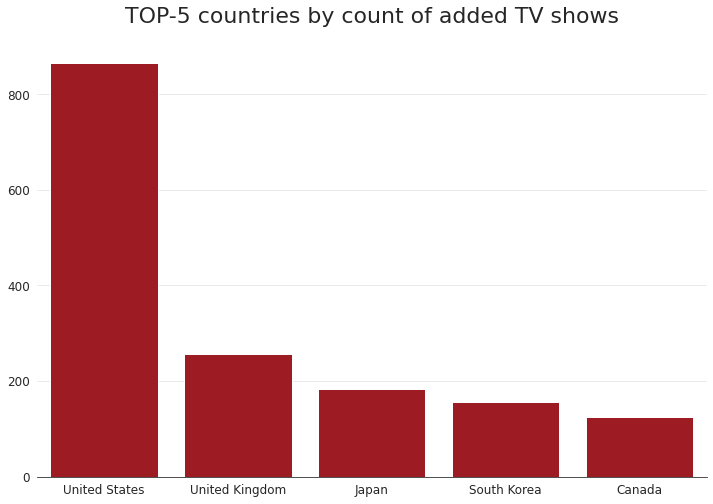

In [104]:
sns.set_style('white')
plt.figure(figsize = (12, 8))
plt.title('TOP-5 countries by count of added TV shows', size = 22, x = 0.5, y = 1.03)
plt.grid(color = 'gray', linestyle = '-', axis = 'y', alpha = 0.2)
a = sns.barplot(data = shows_added, x = shows_added['country'], y = shows_added['TV shows'], palette = ['#b20710'])
a.tick_params(labelsize = 12)
plt.ylabel('')
plt.xlabel('')
for i in ['right', 'left', 'top']:
    a.spines[i].set_visible(False)
plt.show()

**Dynamics of adding TV shows by TOP-5 countries**

In [107]:
USaddS = films.query('`United States` == 1 & type == "TV Show"').groupby('year_added').agg({'United States': 'count'}).drop('data', axis = 0)
UKaddS = films.query('`United Kingdom` == 1 & type == "TV Show"').groupby('year_added').agg({'United Kingdom': 'count'}).drop('data', axis = 0)
JPaddS = films.query('Japan == 1 & type == "TV Show"').groupby('year_added').agg({'Japan': 'count'}).drop('data', axis = 0)
SKaddS = films.query('`South Korea` == 1 & type == "TV Show"').groupby('year_added').agg({'South Korea': 'count'})
CANaddS = films.query('Canada == 1 & type == "TV Show"').groupby('year_added').agg({'Canada': 'count'})

WaddS = USaddS.join(UKaddS, how = 'outer')\
.join(JPaddS, how = 'outer')\
.join(SKaddS, how = 'outer')\
.join(CANaddS, how = 'outer').fillna(0).reset_index()

WaddS.tail(5)

,year_added,United States,United Kingdom,Japan,South Korea,Canada
5,2017,105,52.0,22.0,33.0,17.0
6,2018,152,44.0,33.0,18.0,22.0
7,2019,209,64.0,49.0,50.0,26.0
8,2020,281,64.0,53.0,46.0,36.0
9,2021,18,3.0,1.0,0.0,2.0


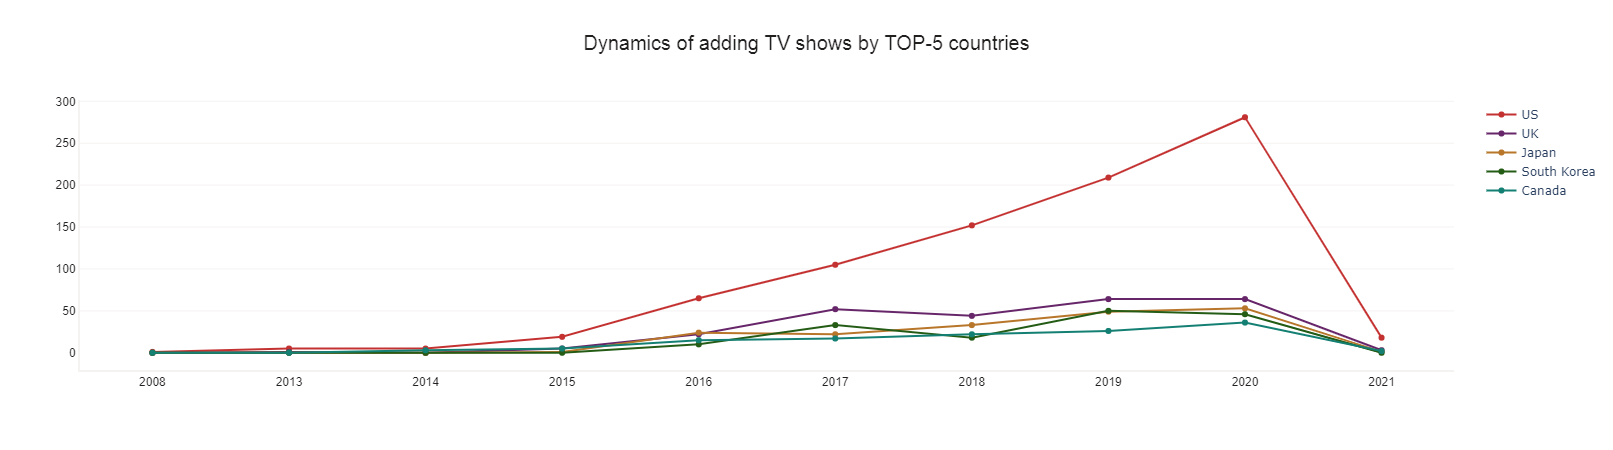

In [108]:
fig = go.Figure()
fig.add_trace(go.Scatter( 
    x = WaddS['year_added'], 
    y = WaddS['United States'],
    mode = 'lines + markers',
    name = 'US',
    marker_color = '#c43131',
))
fig.add_trace(go.Scatter( 
    x = WaddS['year_added'], 
    y = WaddS['United Kingdom'],
    mode = 'lines + markers',
    name = 'UK',
    marker_color = '#672669',
))
fig.add_trace(go.Scatter( 
    x = WaddS['year_added'], 
    y = WaddS['Japan'],
    mode = 'lines + markers',
    name = 'Japan',
    marker_color = '#b8762a',
))
fig.add_trace(go.Scatter( 
    x = WaddS['year_added'], 
    y = WaddS['South Korea'],
    mode = 'lines + markers',
    name = 'South Korea',
    marker_color = '#245c16',
))
fig.add_trace(go.Scatter( 
    x = WaddS['year_added'], 
    y = WaddS['Canada'],
    mode = 'lines + markers',
    name = 'Canada',
    marker_color = '#147f73',
))

fig.update_layout(plot_bgcolor = 'white', title = 'Dynamics of adding TV shows by TOP-5 countries', 
                  title_font_family = 'Arial', title_font_color = '#221f1f', title_font_size = 20, title_x = 0.5)
fig.update_xaxes(showline = True, linecolor = '#f5f2f2', linewidth = 2, tickfont_family = 'Arial', tickfont_color = '#221f1f', tickfont_size = 12)
fig.update_yaxes(showline = True, linecolor = '#f5f2f2', 
                 showgrid = True, gridwidth = 1, gridcolor = '#f5f2f2',
                 linewidth = 2, tickfont_family = 'Arial', tickfont_color = '#221f1f', tickfont_size = 12)

fig.show()

# Distribution adding content by month

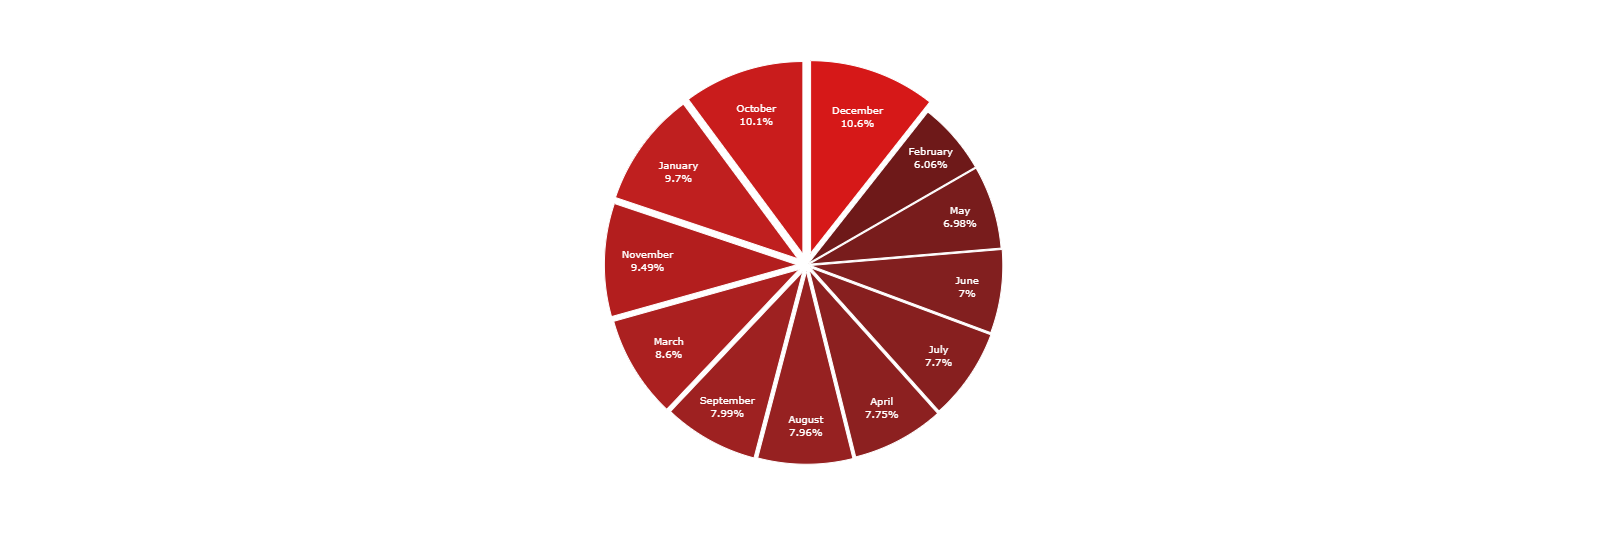

In [201]:
content_by_month = films.query('month_added != "No" & month_added != ""')\
.groupby('month_added').agg({'type': 'count'}).reset_index()\
.rename(columns = {'type': 'content'}).sort_values('content', ascending = False)

fig = px.pie(labels = content_by_month['month_added'], values = content_by_month['content'], names = content_by_month['month_added'],
            width = 550, height = 550)

colors = ['#6e1919', '#781c1c', '#821f1f', '#871f1f', '#8c2020', '#962121', '#9e2121', '#ab2020', '#b31e1e', '#bf1f1f', '#c91c1c', '#d61818']
fig.update_traces(hoverinfo = 'label + percent', textfont_size = 10,
                  textinfo = 'label + percent', pull = [0.065, 0.06, 0.055, 0.05, 0.045, 0.04, 0.035, 0.03, 0.025, 0.02, 0.015, 0.015],
                  marker = dict(colors = colors[::-1], line = dict(color = 'white', width = 1)))
fig.update_layout(showlegend = False)

fig.show()

New content is most often added in the early winter, and least often added in the summer.

# Duration of movies and TV Shows

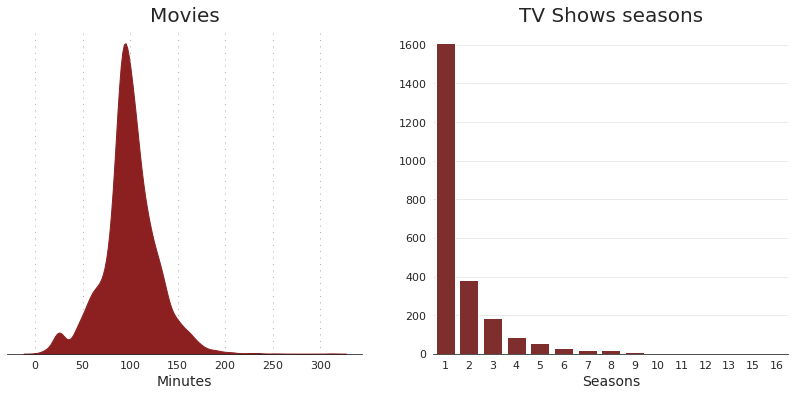

In [172]:
seasons = films.query("type == 'TV Show'").groupby('duration').agg({'title': 'count'}).reset_index()

fig = plt.figure(figsize = (14, 6))

plt.subplot(121)
sns.set_style("white")
plt.title('Movies', size = 20)
a = sns.kdeplot(films.query('type == "Movie"')['duration'], color = '#8c2020', shade = True, alpha = 1)
plt.grid(color = 'gray', linestyle = ':', axis = 'x', zorder = 0,  dashes = (1,7))
for i in ['right', 'left', 'top']:
    a.spines[i].set_visible(False)
a.tick_params(labelsize = 11)
plt.ylabel('')
plt.xlabel('Minutes', size = 14)
plt.yticks([])

plt.subplot(122)
plt.title('TV Shows seasons', size = 20)
plt.grid(color = 'gray', linestyle = '-', axis = 'y', alpha = 0.2)
b = sns.barplot(data = seasons, x = seasons['duration'], y = seasons['title'], palette = ['#8c2020'])
b.tick_params(labelsize = 11)
plt.ylabel('')
plt.xlabel('Seasons', size = 14)
for i in ['right', 'left', 'top']:
    b.spines[i].set_visible(False)

plt.show()

# What age groups are content created for?

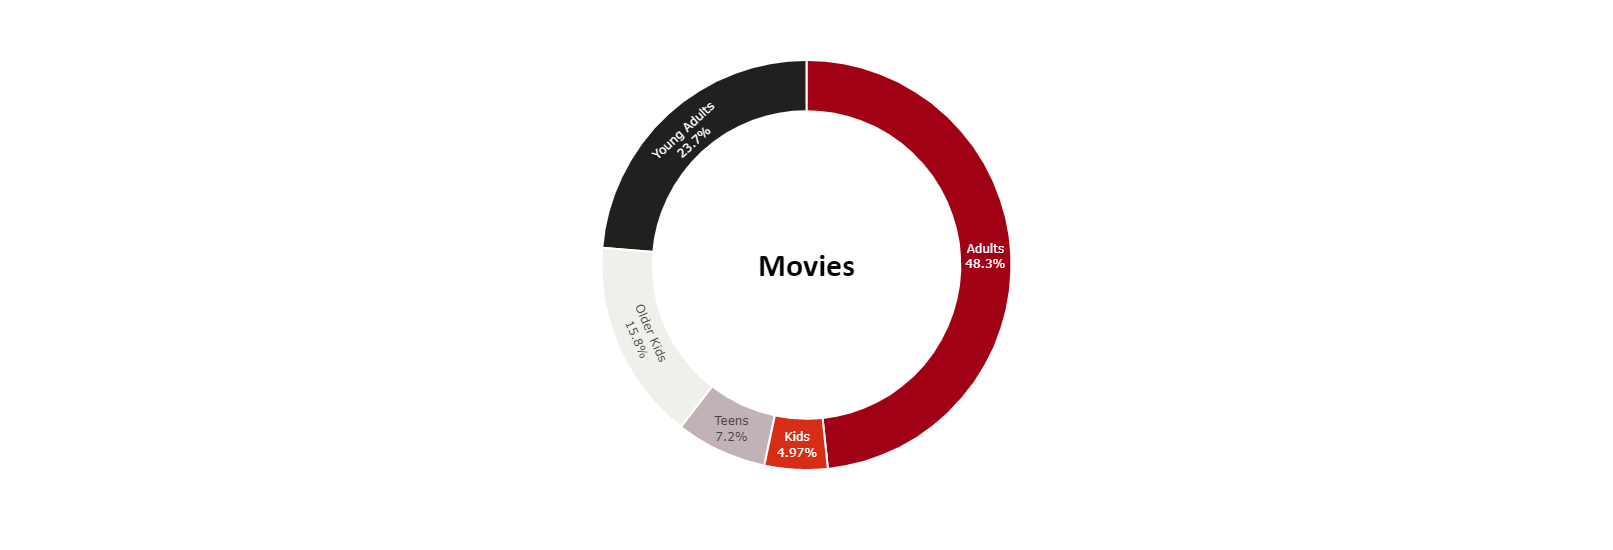

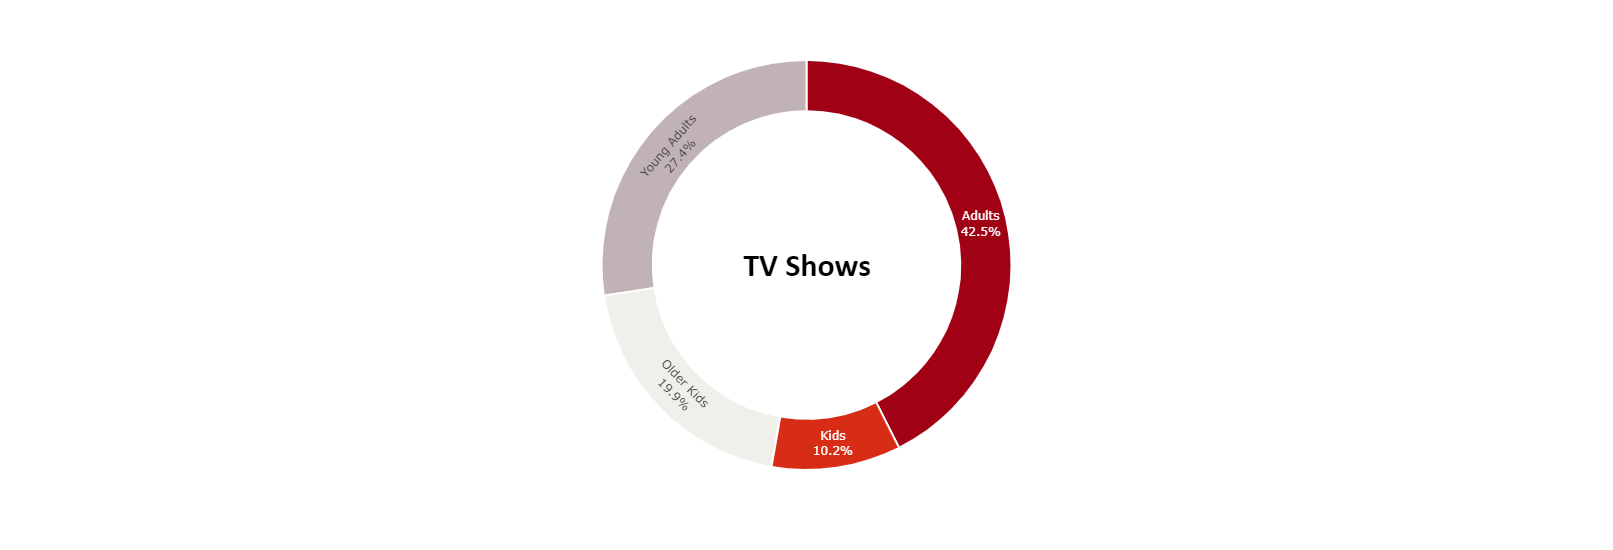

In [182]:
movie_age_groups = films.query('type == "Movie"').groupby('age_group').agg({'age_group': 'count'}).rename(columns = {'age_group': 'content'}).reset_index()
tvshow_age_groups = films.query('type == "TV Show"').groupby('age_group').agg({'age_group': 'count'}).rename(columns = {'age_group': 'content'}).reset_index()

fig = px.pie(labels = movie_age_groups['age_group'], values = movie_age_groups['content'], names = movie_age_groups['age_group'], width = 550, height = 550)

fig.update_traces(textposition = 'inside', 
                  textinfo = 'percent + label', 
                  hole = 0.75, 
                  marker = dict(colors = ['#A10115', '#D72C16', '#F0EFEA', '#C0B2B5', '#221f1f'], 
                                line = dict(color = 'white', width = 2)))

fig.update_layout(annotations = [dict(text = 'Movies', 
                                      x = 0.5, y = 0.5, font_size = 32, showarrow = False, 
                                      font_family = 'Calibri Black',
                                      font_color = 'black')],
                  showlegend = False)

fig.show()

####################################################

fig2 = px.pie(labels = tvshow_age_groups['age_group'], values = tvshow_age_groups['content'], names = tvshow_age_groups['age_group'], width = 550, height = 550)

fig2.update_traces(textposition = 'inside', 
                  textinfo = 'percent + label', 
                  hole = 0.75, 
                  marker = dict(colors = ['#A10115', '#D72C16', '#F0EFEA', '#C0B2B5', '#221f1f'], 
                                line = dict(color = 'white', width = 2)))

fig2.update_layout(annotations = [dict(text = 'TV Shows', 
                                      x = 0.5, y = 0.5, font_size = 32, showarrow = False, 
                                      font_family = 'Calibri Black',
                                      font_color = 'black')],
                  showlegend = False)

fig2.show()

# Distribution of the main genres

In [202]:
films_genres = pd.DataFrame(columns = ['genre', 'count'], index = range(7))
films_genres.iloc[0, 0] = 'Dramas'
films_genres.iloc[0, 1] = films.query('Dramas == 1').agg({'title': 'count'})[0]
films_genres.iloc[1, 0] = 'Comedies'
films_genres.iloc[1, 1] = films.query('Comedies == 1').agg({'title': 'count'})[0]
films_genres.iloc[2, 0] = 'Action & Adventure'
films_genres.iloc[2, 1] = films.query('`Action & Adventure` == 1').agg({'title': 'count'})[0]
films_genres.iloc[3, 0] = 'Documentaries'
films_genres.iloc[3, 1] = films.query('Documentaries == 1').agg({'title': 'count'})[0]
films_genres.iloc[4, 0] = 'Thrillers'
films_genres.iloc[4, 1] = films.query('Thrillers == 1').agg({'title': 'count'})[0]
films_genres.iloc[5, 0] = 'Horror Movies'
films_genres.iloc[5, 1] = films.query('`Horror Movies` == 1').agg({'title': 'count'})[0]
films_genres.iloc[6, 0] = 'Sci-Fi & Fantasy'
films_genres.iloc[6, 1] = films.query('`Sci-Fi & Fantasy` == 1').agg({'title': 'count'})[0]

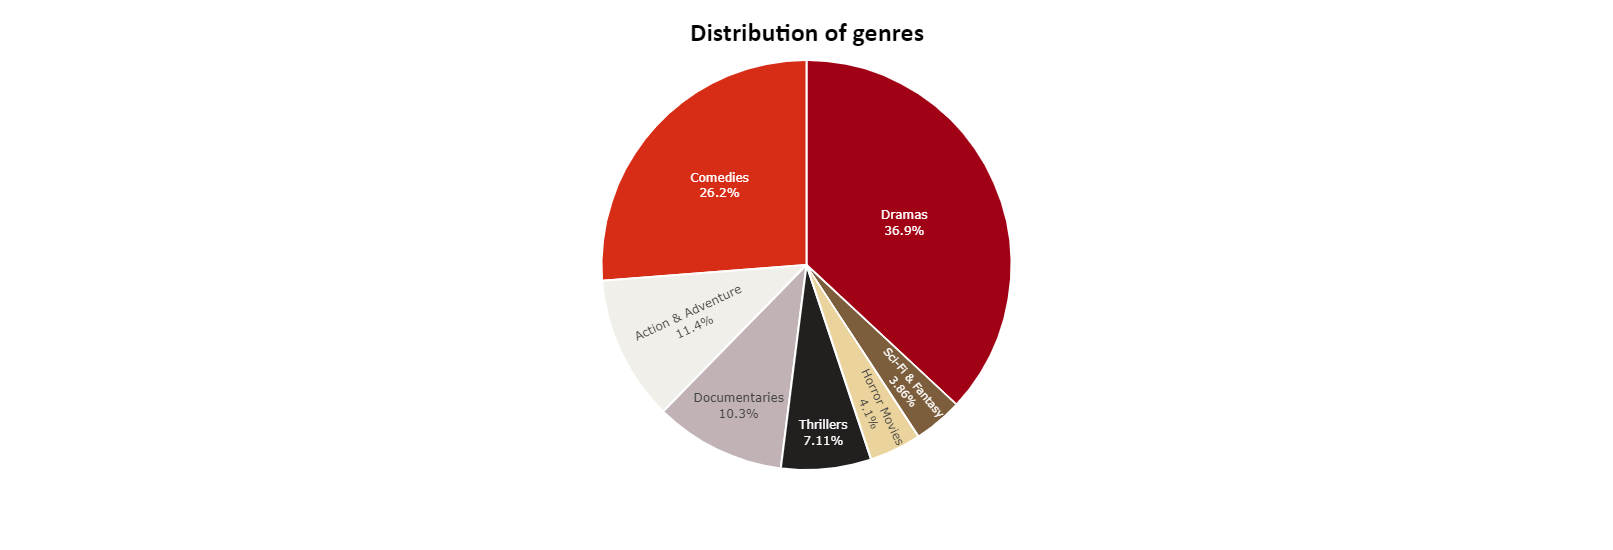

In [191]:
fig = px.pie(labels = films_genres['genre'], values = films_genres['count'], names = films_genres['genre'], width = 550, height = 550)
fig.update_traces(textposition = 'inside', 
                  textinfo = 'percent + label',  
                  marker = dict(colors = ['#A10115', '#D72C16', '#F0EFEA', '#C0B2B5', '#221f1f', '#EAD39C', '#7D5E3C'], line = dict(color = 'white', width = 2)))

fig.update_layout(annotations = [dict(text = 'Distribution of genres', 
                                      x = 0.5, y = 1.11, font_size = 26, showarrow = False, 
                                      font_family = 'Calibri Black',
                                      font_color = 'black')],
                  showlegend = False)
                  
fig.show()

# Distribution of main genres in US, India and Japan

In [206]:
dist = pd.DataFrame(columns = ['country', 'genre', 'count'], index = range(21))
dist.iloc[0:7, 0] = 'US'
dist.iloc[7:14, 0] = 'India'
dist.iloc[14:22, 0] = 'Japan'
dist.iloc[[0, 7, 14], 1] = 'Dramas'
dist.iloc[[1, 8, 15], 1] = 'Comedies'
dist.iloc[[2, 9, 16], 1] = 'Action & Adventure'
dist.iloc[[3, 10, 17], 1] = 'Documentaries'
dist.iloc[[4, 11, 18], 1] = 'Thrillers'
dist.iloc[[5, 12, 19], 1] = 'Horror Movies'
dist.iloc[[6, 13, 20], 1] = 'Sci-Fi & Fantasy'


dist.iloc[0, 2] = films.query('`United States` == 1 & Dramas == 1').agg({'title': 'count'})[0]
dist.iloc[1, 2] = films.query('`United States` == 1 & Comedies == 1').agg({'title': 'count'})[0]
dist.iloc[2, 2] = films.query('`United States` == 1 & `Action & Adventure` == 1').agg({'title': 'count'})[0]
dist.iloc[3, 2] = films.query('`United States` == 1 & Documentaries == 1').agg({'title': 'count'})[0]
dist.iloc[4, 2] = films.query('`United States` == 1 & Thrillers == 1').agg({'title': 'count'})[0]
dist.iloc[5, 2] = films.query('`United States` == 1 & `Horror Movies` == 1').agg({'title': 'count'})[0]
dist.iloc[6, 2] = films.query('`United States` == 1 & `Sci-Fi & Fantasy` == 1').agg({'title': 'count'})[0]

dist.iloc[7, 2] = films.query('India == 1 & Dramas == 1').agg({'title': 'count'})[0]
dist.iloc[8, 2] = films.query('India == 1 & Comedies == 1').agg({'title': 'count'})[0]
dist.iloc[9, 2] = films.query('India == 1 & `Action & Adventure` == 1').agg({'title': 'count'})[0]
dist.iloc[10, 2] = films.query('India == 1 & Documentaries == 1').agg({'title': 'count'})[0]
dist.iloc[11, 2] = films.query('India == 1 & Thrillers == 1').agg({'title': 'count'})[0]
dist.iloc[12, 2] = films.query('India == 1 & `Horror Movies` == 1').agg({'title': 'count'})[0]
dist.iloc[13, 2] = films.query('India == 1 & `Sci-Fi & Fantasy` == 1').agg({'title': 'count'})[0]

dist.iloc[14, 2] = films.query('Japan == 1 & Dramas == 1').agg({'title': 'count'})[0]
dist.iloc[15, 2] = films.query('Japan == 1 & Comedies == 1').agg({'title': 'count'})[0]
dist.iloc[16, 2] = films.query('Japan == 1 & `Action & Adventure` == 1').agg({'title': 'count'})[0]
dist.iloc[17, 2] = films.query('Japan == 1 & Documentaries == 1').agg({'title': 'count'})[0]
dist.iloc[18, 2] = films.query('Japan == 1 & Thrillers == 1').agg({'title': 'count'})[0]
dist.iloc[19, 2] = films.query('Japan == 1 & `Horror Movies` == 1').agg({'title': 'count'})[0]
dist.iloc[20, 2] = films.query('Japan == 1 & `Sci-Fi & Fantasy` == 1').agg({'title': 'count'})[0]

# Because of the classification done for a more accurate analysis, it is impossible to make this table through groupby (which would be many times faster), 
# so I had to write directly :(

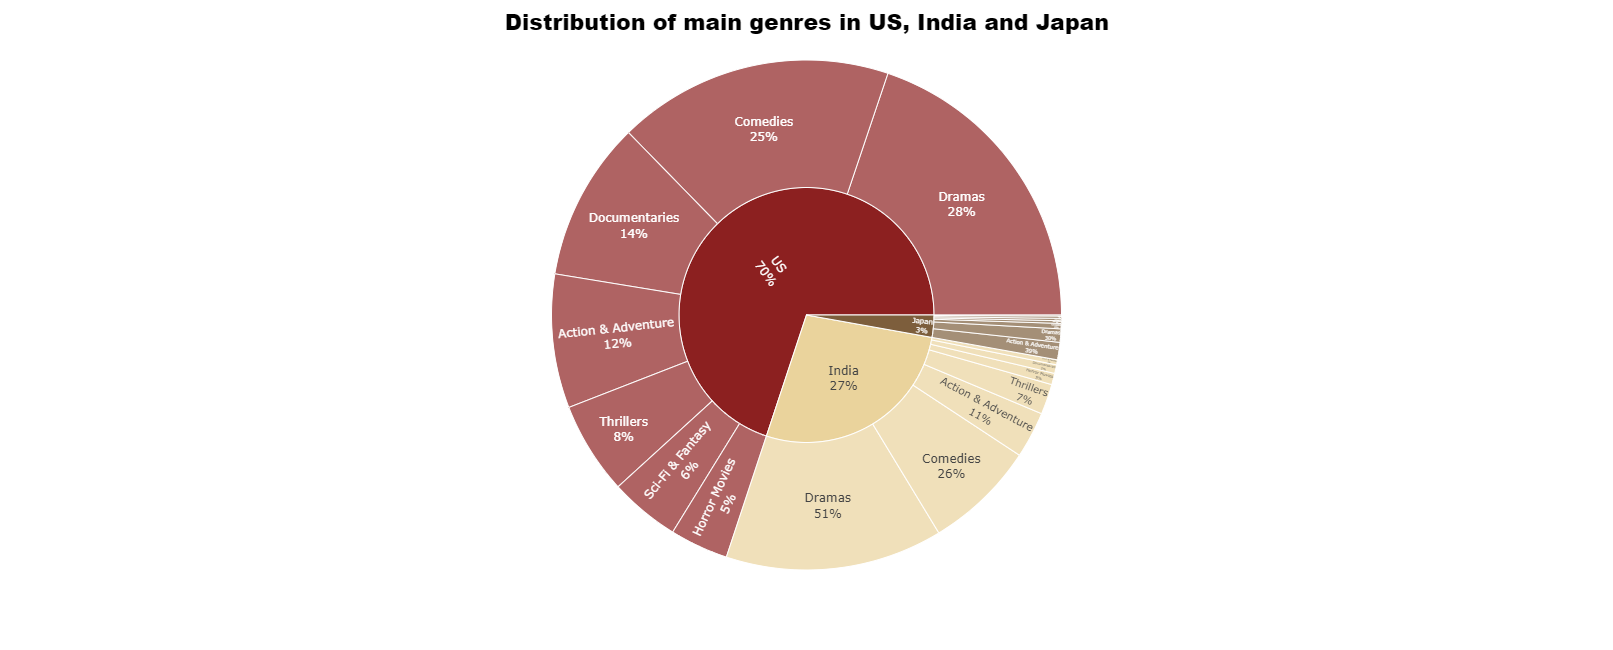

In [205]:
fig = px.sunburst(dist, path = ['country', 'genre'], values = 'count', color = 'country',
                 color_discrete_map = {'US': '#8C2020', 'India': '#EAD39C', 'Japan': '#7D5E3C'},
                 width = 650, height = 650)

fig.update_layout(annotations = [dict(text = 'Distribution of main genres in US, India and Japan', 
                                      x = 0.5, y = 1.11, font_size = 22, showarrow = False, 
                                      font_family = 'Arial Black',
                                      font_color = 'black')])

fig.update_traces(textinfo = 'label + percent parent')
                  
fig.show()

# End